In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [8]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum1 = defaultdict(float)
    returns_count1 = defaultdict(float)
    returns_sum2 = defaultdict(float)
    returns_count2 = defaultdict(float)    
    
    # The final value function
    V1 = defaultdict(float)
    V2 = defaultdict(float)
    # Implement this!
    debug1 = 0
    debug2 = 0
    for i_episode in range(num_episodes):
        state = env.reset()
        episode = []
        for steps in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        #print(episode)
#         states_in_episode = set([tuple(x[0]) for x in episode])
#         for state in states_in_episode:
#             # Find the first occurance of the state in the episode
#             first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == state)
#             # Sum up all rewards since the first occurance
#             G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
#             # Calculate average return for this state over all sampled episodes
#             returns_sum1[state] += G
#             returns_count1[state] += 1.0
#             debug1 += 1
#             V1[state] = returns_sum1[state] / returns_count1[state]
        G2 = 0
        for i in range(len(episode)-1, -1, -1):
            state, action, reward = episode[i]
            G2 = discount_factor*G2 + reward
            returns_sum2[state] += G2
            returns_count2[state] += 1.0
            debug2 += 1
            V2[state] = returns_sum2[state]/returns_count2[state]
            
    #print(debug1, debug2)
    return V2#, V2, returns_sum1, returns_sum2,returns_count1,returns_count1  

In [10]:
#V1,V2,returns_sum1, returns_sum2,returns_count1,returns_count2 = mc_prediction(sample_policy, env, num_episodes=10000)
#print(returns_count1)
#print(returns_count2)

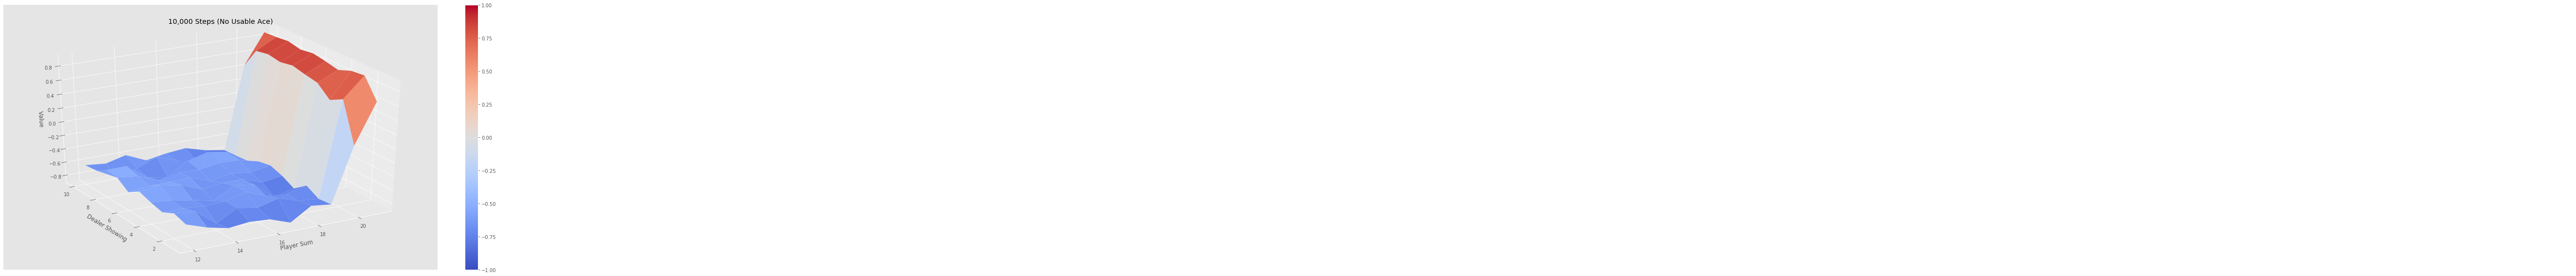

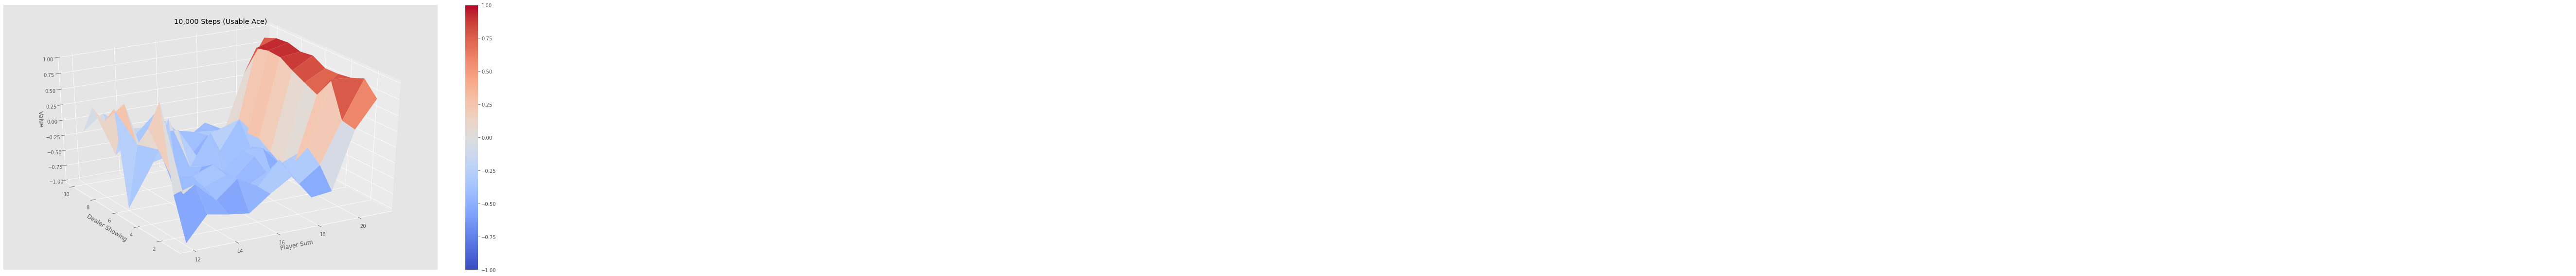

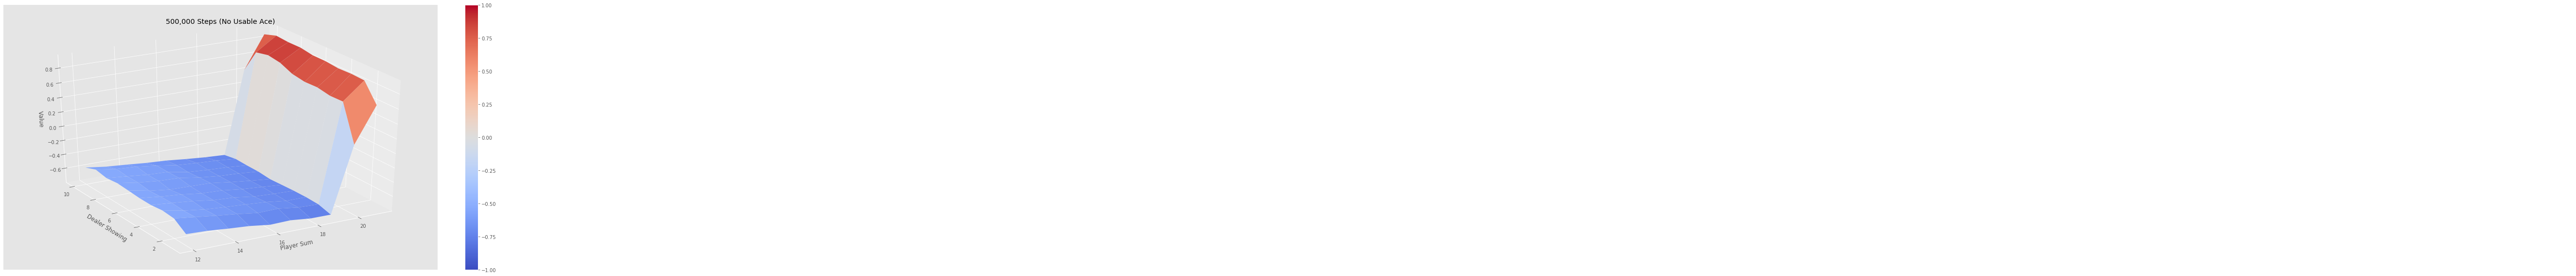

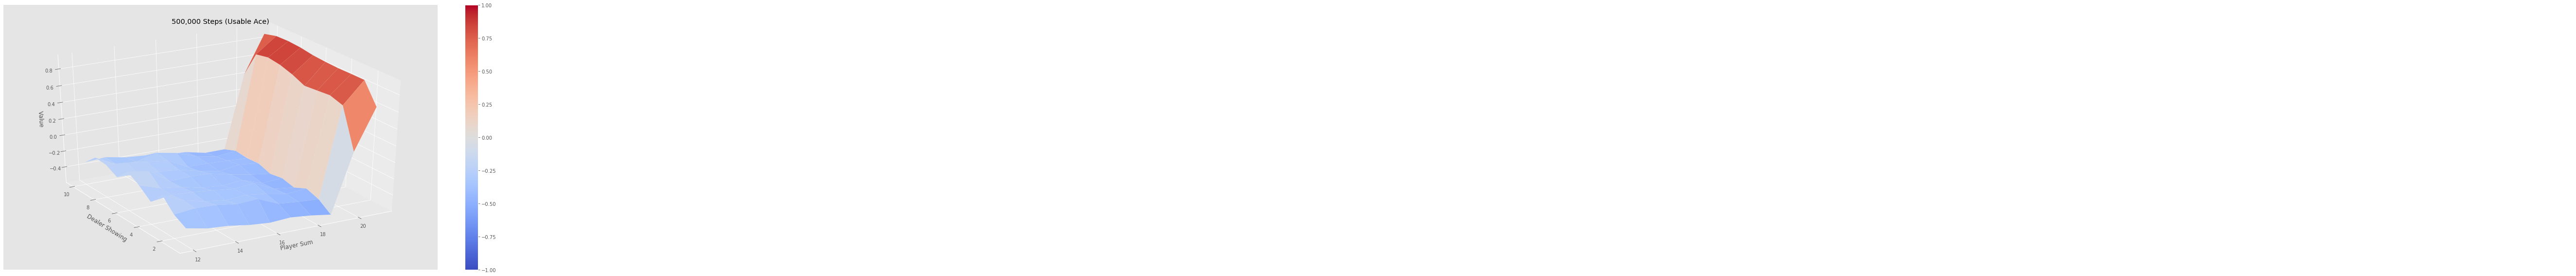

In [11]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")